 ##### Sentiment analysis is the interpretation and classification of text-based data. The point of this analysis is to categorize each data-point into a class that represents its quality (positive, negative, etc.). Sentiment analysis focuses on the polarity, emotions, and intentions of authors. Classic sentiment analysis consists of the following steps: preprocessing, training, feature extraction,and classification.

### Importing data from sqlite database

In [308]:
import pandas as pd

In [430]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
import sqlite3

In [432]:
con= sqlite3.connect(r"C:\Users\dines\Downloads\database.sqlite")

In [433]:
df= pd.read_sql_query('SELECT* FROM Reviews',con)

In [434]:
df.shape

(568454, 10)

In [435]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [436]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [437]:
df['HelpfulnessNumerator']>df['HelpfulnessDenominator'] ##invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [438]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]

Id   ProductId          UserId              ProfileName  \
44736  44737  B001EQ55RW  A2V0I904FH7ABY                      Ram   
64421  64422  B000MIDROQ  A161DK06JJMCYF  J. E. Stephens "Jeanne"   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
44736                     3                       2      4  1212883200   
64421                     3                       1      5  1224892800   

                                            Summary  \
44736  Pure cocoa taste with crunchy almonds inside   
64421             Bought This for My Son at College   

                                                    Text  
44736  It was almost a 'love at first bite' - the per...  
64421  My son loves spaghetti so I didn't hesitate or...

In [439]:
df_valid=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]

In [440]:
df_valid.shape

(568452, 10)

In [441]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

### Performing Sentiment Analysis on Data

In [442]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

Id   ProductId          UserId         ProfileName  \
29          30  B0001PB9FY  A3HDKO7OW0QNK4        Canadian Fan   
574        575  B000G6RYNE  A3PJZ8TU8FDQ1K        Jared Castle   
1973      1974  B0017165OG  A2EPNS38TTLZYN            tedebear   
2309      2310  B0001VWE0M   AQM74O8Z4FMS0            Sunshine   
2323      2324  B0001VWE0C   AQM74O8Z4FMS0            Sunshine   
...        ...         ...             ...                 ...   
568409  568410  B0018CLWM4  A2PE0AGWV6OPL7  Dark Water Mermaid   
568410  568411  B0018CLWM4   A88HLWDCU57WG                 R28   
568411  568412  B0018CLWM4   AUX1HSY8FX55S                 DAW   
568412  568413  B0018CLWM4   AVZ2OZ479Q9E8        Ai Ling Chow   
568413  568414  B0018CLWM4   AI3Y26HLPYW4L            kimosabe   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
29                         1                       1      5  1107820800   
574                        2                       2      5  1231718400   
1973                       0                       0      3  1312675200   
2309                       0                       0      2  1127606400   
2323                       0                       0      2  1127606400   
...                      ...                     ...    ...         ...   
568409                     3                       3      5  1309651200   
568410                     2                       2      5  1332979200   
568411                     1                       1      5  1319500800   
568412                     0                       0      5  1336435200   
568413                     1                       2      2  1330041600   

                                            Summary  \
29                  The Best Hot Sauce in the World   
574     One bite and you'll become a "chippoisseur"   
1973                                      Pok Chops   
2309                                 Below standard   
2323                                 Below standard   
...                                             ...   
568409                    Quality & affordable food   
568410                                   litter box   
568411                                 Happy Camper   
568412                       Two Siberians like it!   
568413                        premium edge cat food   

                                                     Text  
29      I don't know if it's the cactus or the tequila...  
574     I'm addicted to salty and tangy flavors, so wh...  
1973    The pork chops from Omaha Steaks were very tas...  
2309    Too much of the white pith on this orange peel...  
2323    Too much of the white pith on this orange peel...  
...                                                   ...  
568409  I was very pleased with the ingredient quality...  
568410  My main reason for the five star review has to...  
568411  I bought this to try on two registered Maine C...  
568412  When we brought home two 3-month-old purebred ...  
568413  My cats don't like it. what else can I say to ...  

[174521 rows x 10 columns]

In [443]:
data=df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [444]:
data.shape

(393931, 10)

In [445]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [446]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

In [447]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

 ### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1.Analyzing the social media discussion around a certain topic
    2.Evaluating survey responses
    3.Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.

In [448]:
!pip install TextBlob


In [449]:
from textblob import TextBlob


In [450]:
text=df['Summary'][0]

In [451]:
text

'Good Quality Dog Food'

In [452]:
TextBlob(text).sentiment.polarity

0.7

In [453]:
polarity=[]

for i in df['Summary']:
    try:
        polarity.append( TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [454]:
len(polarity)

568454

In [455]:
data= df.copy()

In [456]:
data['polarity']=polarity

In [457]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

### Perform EDA for positive sentences

In [458]:
data_positive=data[data['polarity']>0]

In [459]:
data_positive.shape

(331665, 11)

In [460]:
!pip install wordcloud

In [461]:
from wordcloud import WordCloud,STOPWORDS

In [462]:
stopwords=set(STOPWORDS)

In [463]:
total_text=(''.join(data_positive['Summary']))

In [464]:
total_text

'Good Quality Dog FoodGreat taffyNice TaffyGreat!  Just as good as the expensive brands!Wonderful, tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this "diet" food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy!Love it!GREAT SWEET CANDY!Always freshDelicious product!Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine!Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry!satisfyingLove Gluten Free Oatmeal!!!GOOD WAY TO START THE DAY....Wife\'s favorite BreakfastWhy wouldn\'t you buy oatmeal from Mcanns? Tastes great!Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won\'t order the Variety PackHOT!  And good!  Came back for more  :)Roasts up a smooth brewOur guests love it!Awesome Deal!Awsome - Kids in neighborhood loved us!great deal.Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good.How much would you

In [465]:
import re

In [466]:
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [467]:
total_text=re.sub(' +',' ',total_text)

In [468]:
total_text[0:10000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat Just as good as the expensive brands Wonderful tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this diet food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT And good Came back for more Roasts up a smooth brewOur guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pay for a bag of choco

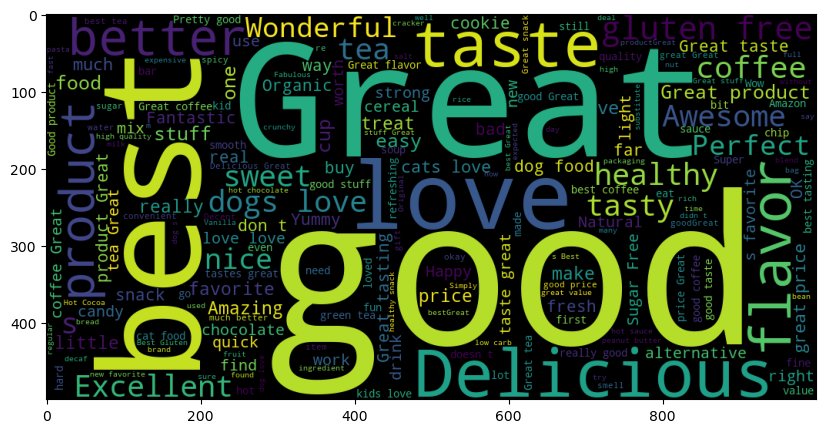

In [469]:
wordcloud= WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)



### Perform EDA for negative sentences

In [470]:
data_negative=data[data['polarity']<0]

In [471]:
data_negative.shape

(52516, 11)

In [472]:
total_text2=(''.join(data_negative['Summary']))

In [473]:
total_text2=re.sub('[^a-zA-Z]',' ',total_text2)

In [474]:
total_text2=re.sub(' +',' ',total_text2)

(-0.5, 999.5, 499.5, -0.5)

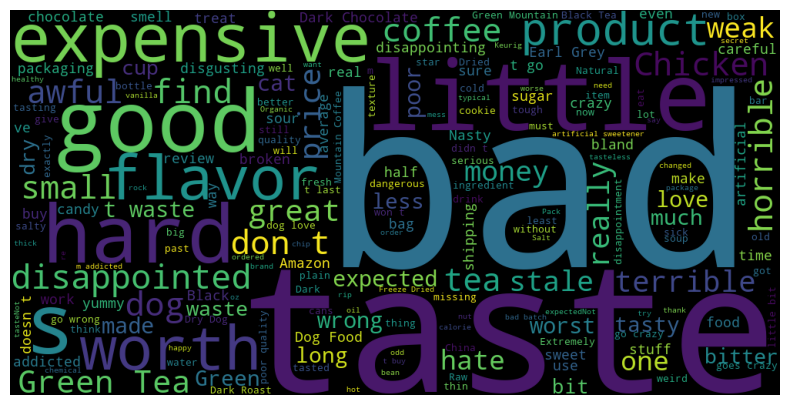

In [475]:
wordcloud2= WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')


## Analysing what customers amazon should recommend more products.

#### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement



In [476]:
df['UserId'].nunique()

256059

In [477]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [478]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [479]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [480]:
raw.columns=['no_of_summary','num_text','avg_score','no_of_prod_purchased']
raw

no_of_summary  num_text  avg_score  no_of_prod_purchased
UserId                                                                  
A3OXHLG6DIBRW8            448       448   4.535714                   448
A1YUL9PCJR3JTY            421       421   4.494062                   421
AY12DBB0U420B             389       389   4.647815                   389
A281NPSIMI1C2R            365       365   4.841096                   365
A1Z54EM24Y40LL            256       256   4.453125                   256
...                       ...       ...        ...                   ...
A2HROKQO0GA5AF              1         1   3.000000                     1
A2HROR28DMJV2W              1         1   5.000000                     1
A2HRR8CO2Y20G8              1         1   5.000000                     1
A2HRSML93IK9TR              1         1   5.000000                     1
AZZZOVIBXHGDR               1         1   2.000000                     1

[256059 rows x 4 columns]

In [677]:
#user_10=raw.index[0:10]

In [678]:
#num_10=raw['no_of_prod_purchased'][0:10]

In [679]:
#plt.bar(user_10,num_10,label='most recommended user')
#plt.xlabel('UserId')
#plt.ylabel('no_of_prod_purchased')
#plt.xticks(rotation='vertical')

#### These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a high probability that these person are going to be buy more




### Which Product has a good number of reviews

In [680]:
#data['ProductId'].nunique()

In [681]:
#prod_count=data['ProductId'].value_counts().to_frame()

In [682]:
#prod_count

In [683]:
#prod_count[prod_count['ProductId']>500]

In [684]:
#freq_prod_ids=prod_count[prod_count['ProductId']>500].index

In [685]:
#data['ProductId'].isin(freq_prod_ids)

In [686]:
#freq_prod_df=data[data['ProductId'].isin(freq_prod_ids)]

In [687]:
#freq_prod_df

In [688]:
#freq_prod_df.columns

In [689]:
#sns.countplot(y='ProductId', data=freq_prod_df, hue='Score')

### IS there any difference between behaviour of frequent user and not frequent user?

In [690]:
#x=data['UserId'].value_counts()

In [691]:
#x

In [692]:
#data['viewer_type']=data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')

In [693]:
#data.head(5)

In [694]:
#not_freq_viewer=data[data['viewer_type']=='Not Frequent']
#freq_viewer=data[data['viewer_type']=='Frequent']

In [695]:
#freq_viewer['Score'].value_counts()/len(freq_viewer)*100

In [696]:
#not_freq_viewer['Score'].value_counts()/len(not_freq_viewer)*100

In [697]:
#freq_viewer['Score'].value_counts().plot(kind='bar')

In [698]:
#not_freq_viewer['Score'].value_counts().plot(kind='bar')

### The distribution of ratings among frequent reviewers is similar to that of all reviews. 
### However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
### Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

## Are frequent users more verbose?

In [699]:
#data['Text'][0]

In [700]:
#type(data['Text'][0])

In [701]:
#type(data['Text'][0].split(' '))

In [702]:
#len(data['Text'][0].split(' '))

In [703]:
#def calculate_len(text):
#    return len(text.split(' '))

In [704]:
#data['Text_lenght']=data['Text'].apply(calculate_len)

In [705]:
#not_freq_data=data[data['viewer_type']=='Not Frequent']
#freq_data=data[data['viewer_type']=='Frequent']

In [706]:
#not_freq_data

In [707]:
#fig=plt.figure()
#ax1=fig.add_subplot(121)
#ax1.boxplot(freq_data['Text_lenght'])
#ax1.set_xlabel('frequency of frequent reviewers')

#ax2=fig.add_subplot(122)
#ax2.boxplot(not_freq_data['Text_lenght'])
#ax2.set_xlabel('frequency of not frequent reviewers')


#### The distributions of word counts for frequent and infrequent reviews shows that 
#### infrequent reviewers have a large amount of reviews of low word count.
#### On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 


### Analyse Length of Comments whether Customers are going to give Lengthy comments or short one


In [708]:
#final=df[0:2000]

In [709]:
#final.head()

In [710]:
#final.isnull().sum()

In [711]:
#final.duplicated().sum()

In [712]:
#len(final['Text'][0].split(' '))

In [713]:
#def calc_length(text):
#    return len(text.split(' '))

In [714]:
#final['Text_length']=final['Text'].apply(calc_length)

In [715]:
#import plotly.express as px

In [716]:
#px.box(final,y='Text_length')

#### Conclusion-->>
    Seems to have Almost 50 percent users are going to give their Feedback limited to 50 words whereas there are only few users who are going give Lengthy Feedbacks

### Analysing score

In [717]:
#sns.countplot(final['Score'])

### Analysing behavior of customers

### Text preprocessing

In [718]:
#final['Text'][0]

In [719]:
#final['Text']=final['Text'].str.lower()

In [720]:
#data=final['Text'][164]

In [721]:
#punctuation= '''@!#$%^*()<:;{}?/[]'''
#data= final['Text'][164]
#no_punc =''
#for char in data:
#    if char not in punctuation:
#        no_punc=no_punc+char
#no_punc
#    

In [722]:
#import string
#punctuations=string.punctuation

#def remove_punc(review):
 #   no_punc =''
  #  for char in review:
   #     if char not in punctuations:
    #        no_punc=no_punc+char
    #return no_punc

In [723]:
#final['Text']=final['Text'].apply(remove_punc)

In [724]:
#final.head()


In [725]:
#import nltk
#from nltk.corpus import stopwords

In [726]:
#data=final['Text'][164]

In [727]:
#data

In [728]:
#re=[word for word in data.split(' ') if word not in set(stopwords.words('english'))]

#str=' '
#for wd in re:
#    str=str+wd
#    str=str+' '

#str

In [729]:
#def remove_stopword(review):
#    return' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [730]:
#final['Text']=final['Text'].apply(remove_stopword)

In [731]:
#final['Text'][45]

In [732]:
#final['Text'].str.contains('http').sum()

In [733]:
#pd.set_option('display.max_row',2000)
#final['Text'].str.contains('http')


In [734]:
#review=final['Text'][21]

In [735]:
#review

In [736]:
#import re

In [737]:
#url_pattern=re.compile(r'href|http.\w+')
#url_pattern.sub(r'',review)

In [738]:
#def remove_url(review):
#    url_pattern=re.compile(r'href|http.\w+')
#    return url_pattern.sub(r'',review)

In [739]:
#final['Text']=final['Text'].apply(remove_url)

In [740]:
#final['Text'][34]

In [741]:
#final['Text'][34].replace(' br ','')

In [742]:
#for i in range (len(final['Text'])):
#    final['Text'][i].replace(' br ','')
    

In [743]:
#final.head()

In [744]:
#comment_words=' '.join(final['Text'])

In [745]:
#stopwords=set(STOPWORDS)

In [746]:
###wordcloud3= WordCloud(width=1000,height=500,stopwords=stopwords).generate(comment_words)
#plt.figure(figsize=(15,5))
#plt.imshow(wordcloud3)
#plt.axis('off')
